<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/06_support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer=load_breast_cancer()
X=breast_cancer.data[:,:10]
y=breast_cancer.target

columns=['radius','texture','Circumference','area','smoothness','compactness','dent','number_of_dent','Symmetry','fractal dimension']

df=DataFrame(data=X[:,:10],columns=columns)
df['objective_values']=y

In [0]:
X=df[['area','dent']].values
y=df['objective_values'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# StandardScalerのインスタンスを作成する
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算する
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 訓練データの標準化
X_train_std =sc.transform(X_train)

# テストデータの標準化
# テストデータは訓練データの平均と標準偏差を用いて変換する
X_test_std =sc.transform(X_test)

In [0]:
from sklearn.svm import SVC

In [0]:
svc=SVC(kernel='rbf',C=25,probability=True,random_state=42)

In [0]:
svc.fit(X_train_std,y_train)

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
# テストデータの予測
pred = svc.predict(X_test_std)
# 予測の確認
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [0]:
# 確率
proba =svc.predict_proba(X_test_std)

In [0]:
proba[0]

array([0.09670775, 0.90329225])

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test,pred)

0.9415204678362573

In [0]:
import numpy 
from matplotlib import pyplot
pyplot.rcParams['font.family'] = 'IPAGothic'
from mlxtend.plotting import plot_decision_regions

In [0]:
# すべてのデータをプロットするとデータが多すぎるので制限する
N = 100
# 訓練データとテストデータからNこずつサンプルを先頭から撮ってくる
sampled_X=numpy.vstack((X_train_std[:N],X_test_std[:N]))
sampled_y=numpy.hstack((y_train[:N],y_test[:N]))

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


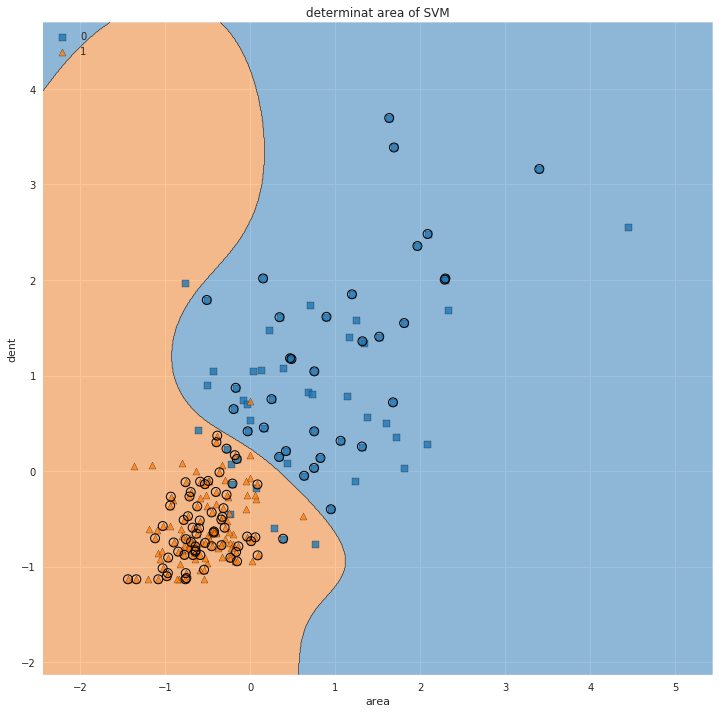

In [0]:
pyplot.figure(figsize=(12,12))
pyplot.xlabel("area")
pyplot.ylabel("dent")
pyplot.title("determinat area of SVM")

# 決定領域のプロット
plot_decision_regions(sampled_X,sampled_y,clf=svc,legend=2,X_highlight=X_test_std[:N])